In [2]:
import numpy as np
from keras import models, layers
from keras.datasets import reuters

In [17]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [18]:
word_index = dict([(value, key) for (key, value) in reuters.get_word_index().items()])

def decode_news_wire (index):
    
    print(
        " ".join([word_index.get(i-3, "?") for i in train_data[index]])
    )
    

In [19]:
decode_news_wire(0)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [15]:
from keras.utils.np_utils import to_categorical

In [25]:
def vectorize_data (data, dimension=10000):
    
    result = np.zeros((len(data), dimension))
    
    for i, seq in enumerate(data):
        
        result[i, seq] = 1
    return result

In [26]:
train_x = vectorize_data(train_data[1000:])
dev_x = vectorize_data(train_data[:1000])
train_y = to_categorical(train_labels[1000:])
dev_y = to_categorical(train_labels[:1000])

In [28]:
train_y.shape

(7982, 46)

In [45]:
# Model 1

model1 = models.Sequential()
model1.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(46, activation='softmax'))

In [46]:
model1.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

In [47]:
history = model1.fit(train_x, train_y, epochs=20, batch_size=512, validation_data=(dev_x, dev_y))

Epoch 1/20


2023-09-16 19:52:07.284836: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 319280000 exceeds 10% of free system memory.


16/16 [==============================] - 1s 40ms/step - loss: 2.6557 - accuracy: 0.5147 - val_loss: 1.7595 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 0s 25ms/step - loss: 1.5011 - accuracy: 0.6800 - val_loss: 1.3707 - val_accuracy: 0.6950
Epoch 3/20
16/16 [==============================] - 0s 26ms/step - loss: 1.1809 - accuracy: 0.7427 - val_loss: 1.2023 - val_accuracy: 0.7280
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 0.9793 - accuracy: 0.7846 - val_loss: 1.0947 - val_accuracy: 0.7500
Epoch 5/20
16/16 [==============================] - 0s 26ms/step - loss: 0.8097 - accuracy: 0.8226 - val_loss: 1.0234 - val_accuracy: 0.7710
Epoch 6/20
16/16 [==============================] - 0s 28ms/step - loss: 0.6764 - accuracy: 0.8513 - val_loss: 0.9620 - val_accuracy: 0.7930
Epoch 7/20
16/16 [==============================] - 0s 27ms/step - loss: 0.5621 - accuracy: 0.8790 - val_loss: 0.9796 - val_accuracy: 0.7770
Epoch 8/20
16/16 [======

In [38]:
import matplotlib.pyplot as plt

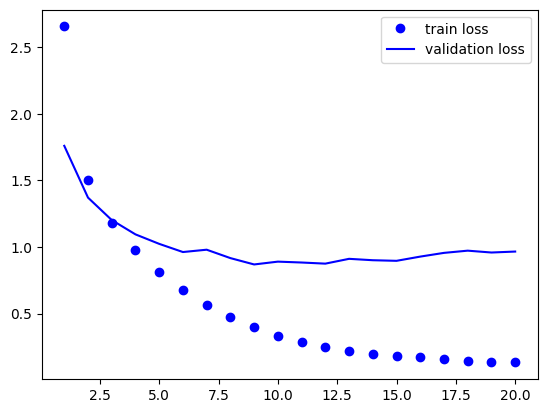

In [48]:
history_dict = history.history

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label="train loss")
plt.plot(epochs, val_loss, 'b', label="validation loss")

plt.legend()

plt.show()

In [52]:
def plot (history, which=1):
    
    text = "accuracy" if which == 1 else "loss"
    
    plt.clf()

    acc = history[text]
    val_acc = history["val_"+text]
    
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, "bo", label="train "+ text)
    plt.plot(epochs, val_acc, "b", label="validation " + text)

    plt.xlabel("epoch")
    plt.ylabel(text)


    plt.legend()
    plt.show()

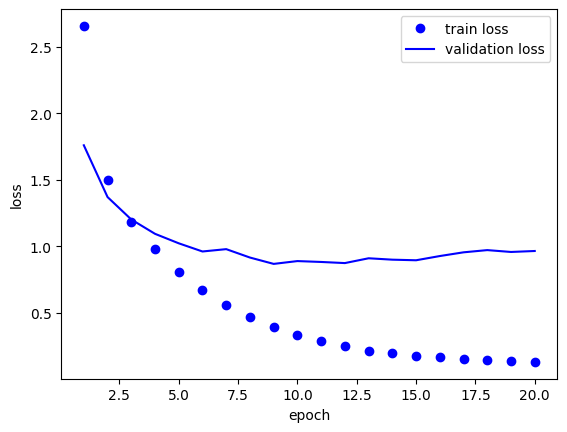

In [54]:
plot(history_dict, 4)

In [56]:
#model2 early stopping

model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

In [58]:
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
history2 = model2.fit(train_x, train_y, epochs=5, batch_size=512, validation_data=(dev_x, dev_y))

Epoch 1/5
16/16 [==============================] - 1s 38ms/step - loss: 2.6737 - accuracy: 0.5242 - val_loss: 1.8487 - val_accuracy: 0.6190
Epoch 2/5
16/16 [==============================] - 1s 32ms/step - loss: 1.5242 - accuracy: 0.6853 - val_loss: 1.3839 - val_accuracy: 0.6900
Epoch 3/5
16/16 [==============================] - 1s 36ms/step - loss: 1.1714 - accuracy: 0.7365 - val_loss: 1.1871 - val_accuracy: 0.7410
Epoch 4/5
16/16 [==============================] - 1s 34ms/step - loss: 0.9525 - accuracy: 0.7876 - val_loss: 1.0790 - val_accuracy: 0.7610
Epoch 5/5
16/16 [==============================] - 1s 48ms/step - loss: 0.7912 - accuracy: 0.8241 - val_loss: 0.9944 - val_accuracy: 0.7830


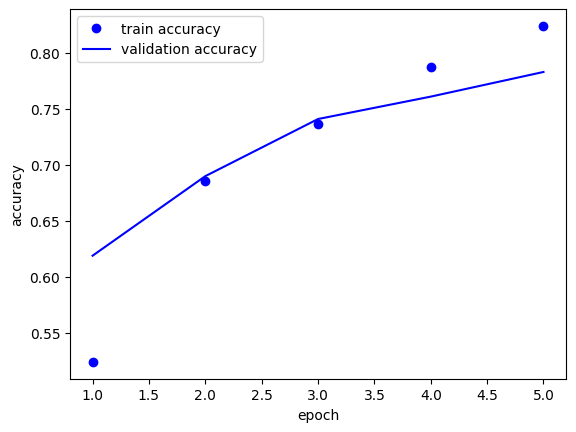

In [60]:
plot(history2.history)